## Observations and Insights 

After careful analysis of data, please see a few observations below:

-Mice with Drug Regimen Capomulin & Ramicane had the lower average tumor volumes out of all regimens with Ramicane being slightly lower. This can indicate that the two regimens had the best results in reducing tumor volumes.

-Given that Capomulin seems promising, a random mouse given this regimen was selected to see trend of tumor volume over time. Mouse tumor decreased 17 mm3, indicating that Capomulin regimin is reducing tumor volume for mouse. 

-There is a strong correlation between mouse weight and tumor volume. Therfore comparing solely the mouse weight might a good indicator for assuming an increase or decrease of tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress
# data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#reading data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#copying data sets
md = mouse_metadata.copy()
sr = study_results.copy()
#merging data sets showing preview
mdf = sr.merge(md, on='Mouse ID', how = 'outer')
mdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Number of Unique mic.- print result
umice = mdf['Mouse ID'].nunique()
print(f'There are {umice} mice in the dataset')

There are 249 mice in the dataset


In [3]:
#Looking for duplicate mice ID that show up for Mouse ID and Timepoint.
#Show data for duplicate data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

dups = mdf.duplicated(subset=['Mouse ID', 'Timepoint'])
mdf.loc[dups]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
#looking for everything besides dup mouse ID
mask = mdf['Mouse ID'] != 'g989'
#new data frame has all exept dup mouse ID
cdf = mdf.loc[mask].reset_index(drop=True)

In [5]:
# Checking the number of mice in the clean DataFrame- print result
numice=cdf['Mouse ID'].nunique()
print(f'After removing duplicate mice data there are {numice} unique mice in dataset')

After removing duplicate mice data there are 248 unique mice in dataset


# Summary Statistics

### Summary Stats using 'groupby' method

In [6]:
#Generate summary statistics for each drug regimen using 'groupby' and placing them in dataframe

avg = cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med =  cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
sem =  cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
ss1 = pd.concat ([avg,med,sem], axis = 1)
ss1.columns = ["Mean", "Median", "SEM"]
ss1.reset_index()


,Drug Regimen,Mean,Median,SEM
0,Capomulin,40.675741,41.557809,0.329346
1,Ceftamin,52.591172,51.776157,0.469821
2,Infubinol,52.884795,51.820584,0.492236
3,Ketapril,55.235638,53.698743,0.603860
4,Naftisol,54.331565,52.509285,0.596466
5,Placebo,54.033581,52.288934,0.581331
6,Propriva,52.320930,50.446266,0.544332
7,Ramicane,40.216745,40.673236,0.320955
8,Stelasyn,54.233149,52.431737,0.573111
9,Zoniferol,53.236507,51.818479,0.516398


### Summary Stats using 'agg' method

In [7]:
#Generate summary statistics for each drug regimen using 'agg' and placing them in dataframe

ss2 = cdf.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})
ss2.columns = ["Mean", "Median", "Variance", "Std Dev.","SEM"]
ss2.reset_index()


,Drug Regimen,Mean,Median,Variance,Std Dev.,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

### Bar Plot using Pandas

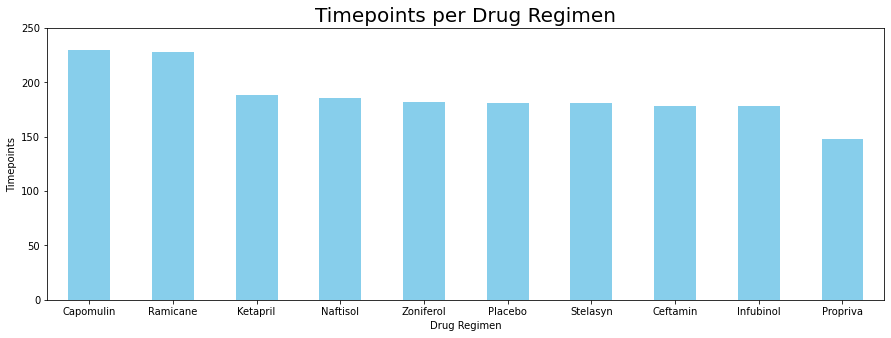

In [8]:
# Bar plot showing total number of timepoints for all mice tested for each drug regimen using Pandas.
bars = cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().sort_values(ascending=False)
grph = bars.plot.bar(color = 'skyblue', title = 'Timepoints per Drug Regimen', ylabel = 'Timepoints', figsize=(15,5), rot=0, ylim=(0, 250))
grph.title.set_size(20)


### Bar Plot using Matplotlib 

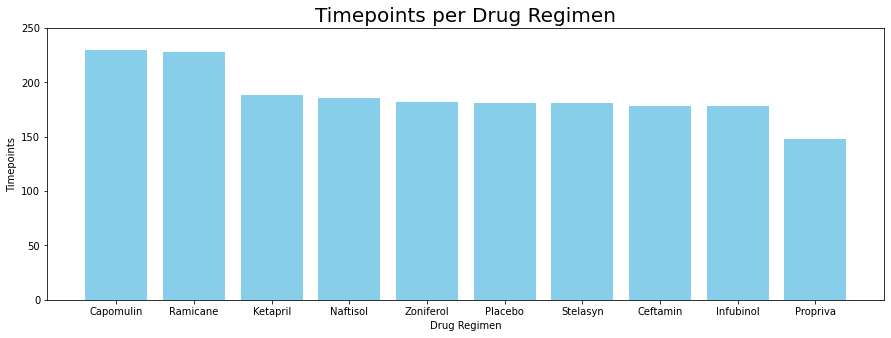

In [9]:
# Bar plot showing total number of timepoints for all mice tested for each drug regimen using Matplotlib.
#adding to dataframe
counts = cdf.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()
dfb = pd.concat([counts], axis=1).reset_index()

#sorting values
bar2 = dfb.sort_values(by="Tumor Volume (mm3)", ascending=False)

# then plot
plt.figure(figsize=(15,5))

plt.bar(bar2['Drug Regimen'], bar2['Tumor Volume (mm3)'], color="skyblue")

plt.title('Timepoints per Drug Regimen',  fontsize = 20)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.ylim(0,250)
plt.show()


### Pie Plot using Pandas

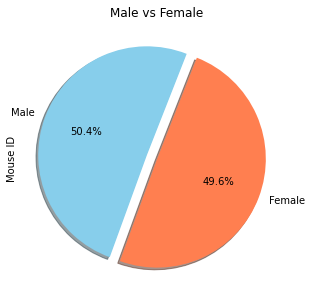

In [10]:
#Pie Plot showing distribution of female versus male mice using Pandas
counts = cdf.groupby('Sex')['Mouse ID'].nunique()
summ1 = pd.concat([counts], axis=1)
plot = summ1.plot.pie(y='Mouse ID', title="Male vs Female", figsize=(10,5), legend=False,autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=250, colors = ["coral", "skyblue"] )


### Pie Plot using Matplotlib 

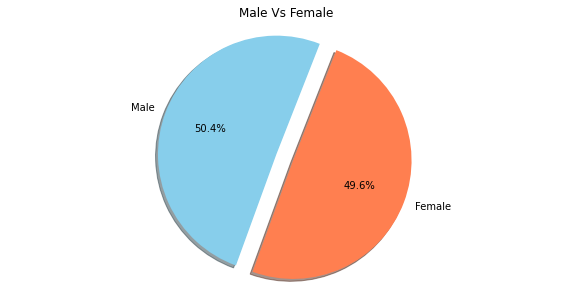

In [11]:
# Pie plot showing the distribution of female versus male mice using pyplot
counts = cdf.groupby('Sex')['Mouse ID'].nunique()
summ2 = pd.concat([counts], axis=1).reset_index()
summ2

Gender = summ2.Sex
Mice = summ2['Mouse ID']
x_axis = np.arange(0, len(Gender))
colors = ["coral", "skyblue"]
explode = (0, 0.15)

plt.figure(figsize=(10,5))

plt.pie(Mice, explode=explode, labels=Gender, colors=colors, autopct="%1.1f%%", shadow=True,  startangle=250)

plt.axis("equal")
plt.title("Male Vs Female")

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
#finding last timepoint for each mouse
times = cdf.groupby('Mouse ID').Timepoint.max().reset_index()

In [13]:
#merge to find only data for last timepoint
cdf3 = pd.merge(cdf, times, on=['Mouse ID', 'Timepoint'], how = 'inner')

In [14]:
#finding & keeping only those mice with most promising treatment regimens
#https://www.geeksforgeeks.org/how-to-check-if-pandas-column-has-value-from-list-of-string/
mask = cdf3['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])
cdf4 = cdf3.loc[mask].reset_index(drop = True)

In [15]:
#looping to record data for each of the drugs and outlier
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
lists = []

for drug in drugs:
    sub = cdf4.loc[cdf4['Drug Regimen'] == drug, "Tumor Volume (mm3)" ]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (cdf4['Drug Regimen'] == drug) & ((cdf4['Tumor Volume (mm3)']> upper_bound )  | (cdf4['Tumor Volume (mm3)']< lower_bound ))
    outlier = cdf4.loc[mask]
    print(outlier)
    
    lists.append(sub)
    
    

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1     c326          5           36.321346                 0    Infubinol   

      Sex  Age_months  Weight (g)  
1  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


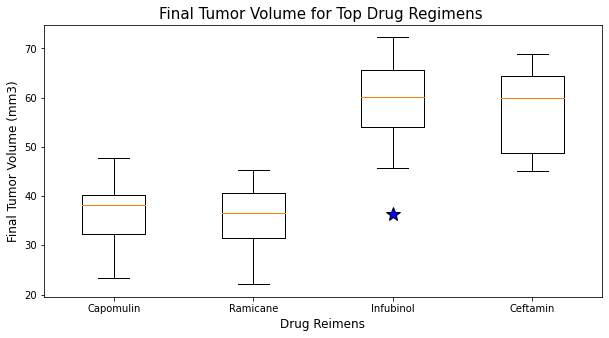

Outlier Mouse c326 on Infubinol with a Final Tumor Volume of 36.321346 mm3


In [16]:
#Using Matplotlib, plot whisker plot and highlight outlier
blue_star = dict(markerfacecolor='b', marker='*', markersize=15,)
plt.figure(figsize=(10,5))
plt.boxplot(lists, labels = drugs, flierprops=blue_star)
plt.title('Final Tumor Volume for Top Drug Regimens ', fontsize=15)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=12)
plt.xlabel('Drug Reimens',fontsize=12)

plt.show()
print(f'Outlier Mouse c326 on Infubinol with a Final Tumor Volume of 36.321346 mm3')

## Line and Scatter Plots

### Line Graph 

In [17]:
#look for mouse treated with Capomulin
drug = 'Capomulin'
Capmice = cdf.loc[cdf['Drug Regimen'] == drug]

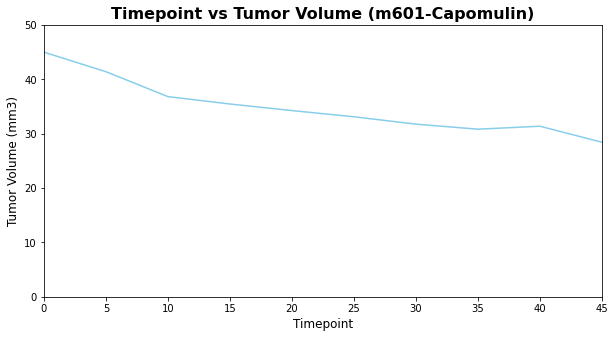

In [18]:
#look for mouse data and make line graph
mask1 = cdf['Mouse ID'] == 'm601'
data2 = cdf.loc[mask1]
plt.figure(figsize=(10,5))
plt.plot(data2['Timepoint'], data2['Tumor Volume (mm3)'], color="skyblue")

plt.title('Timepoint vs Tumor Volume (m601-Capomulin)',fontsize=16, fontweight="bold")
plt.xlabel('Timepoint', fontsize = 12)
plt.ylabel('Tumor Volume (mm3)', fontsize = 12)
plt.ylim(0,50)
plt.xlim(0, 45)
plt.show()

### Scatter Plot

In [19]:
#look for Capomulin mice and find mean 
mask2 = cdf ['Drug Regimen']== 'Capomulin'
data3 = cdf.loc[mask2].groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean().reset_index()


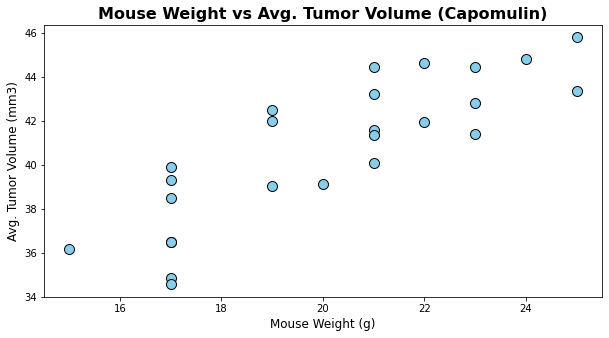

In [20]:
#scatter plot
x_values = data3["Weight (g)"]
y_values = data3["Tumor Volume (mm3)"]

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Mouse Weight vs Avg. Tumor Volume (Capomulin)', fontsize=16, fontweight="bold")
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Avg. Tumor Volume (mm3)', fontsize = 12)
plt.show()



## Correlation and Regression

In [21]:
#finding Correlation Coefficient
cc = data3.loc[:, ["Weight (g)", "Tumor Volume (mm3)"]].corr().values[0][1]
cc=round(cc, 2)
print(f'The Correlation Coefficient between weight and average tumor volume in mice with the Capomulin regimen is {cc}.')

The Correlation Coefficient between weight and average tumor volume in mice with the Capomulin regimen is 0.84.


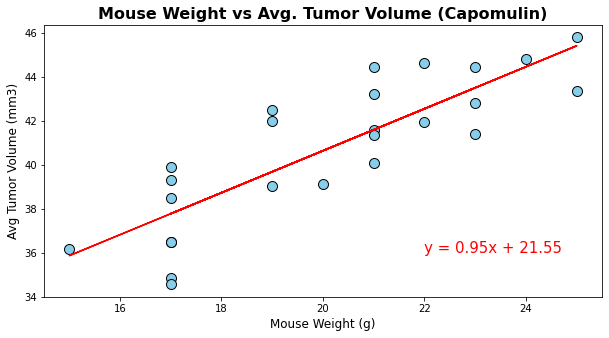

In [22]:
#plot scatter and linear regression model
x_values = data3["Weight (g)"]
y_values = data3["Tumor Volume (mm3)"]

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Mouse Weight vs Avg. Tumor Volume (Capomulin)', fontsize=16, fontweight="bold")
plt.xlabel('Mouse Weight (g)', fontsize = 12)
plt.ylabel('Avg Tumor Volume (mm3)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,36),fontsize=15,color="red")
plt.show()

### Regression Summary

In [23]:
import statsmodels.api as sm
X = data3["Weight (g)"]
X = sm.add_constant(X)

y = data3["Tumor Volume (mm3)"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.32e-07
Time:                        15:10:41   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.0

C:\Users\yvargas1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
